In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/spots_e.csv", usecols=[2,4,5,7])
df.head(10)

,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T
0,1,123.907,25.849,0
1,2,266.186,26.386,0
2,0,8.104,22.640,0
3,1,123.899,26.634,1
4,0,8.135,23.067,1
5,2,266.184,26.394,1
6,0,8.153,23.668,2
7,2,266.208,26.396,2
8,1,123.906,27.565,2
9,0,8.190,24.347,3


In [4]:
spots = df.values
print("Numer of spots:", len(spots)/3)

Numer of spots: 49985.0


In [5]:
origin = []
top = []
bottom = []

for spot in spots:
    spot_coord = [spot[1], spot[2]]
    if spot[0] == 2:
        origin.append(spot_coord)
    elif spot[0] == 1:
        top.append(spot_coord)
    else:
        bottom.append(spot_coord)
        
origin, top, bottom = np.array(origin), np.array(top), np.array(bottom)

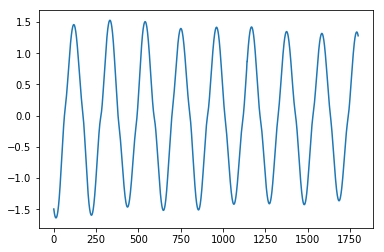

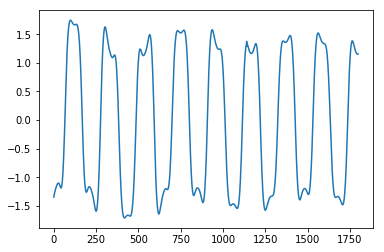

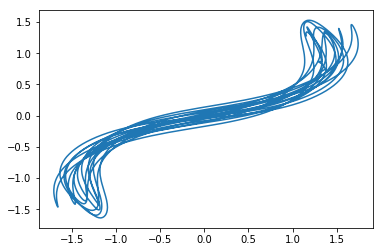

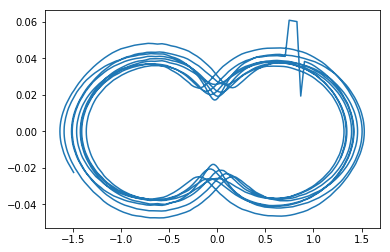

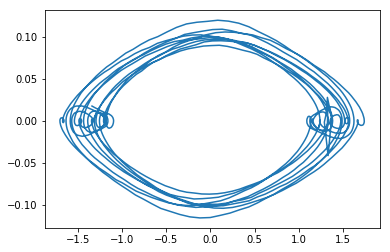

In [6]:
def coord2angle(x):
    slope = x[0] / x[1]
    base = np.arctan(slope)
    if x[0] >= 0 and x[1] >= 0:
        angle = base
    elif x[0] >= 0 and x[1] < 0:
        angle = base + np.pi
    elif x[0] < 0 and x[1] >= 0:
        angle = base
    else:
        angle = base - np.pi
    return angle

top_norm = top - origin
bottom_norm = bottom - top
theta1 = [coord2angle(coord) for coord in top_norm]
theta2 = [coord2angle(coord) for coord in bottom_norm]
theta1p = np.gradient(theta1)
theta2p = np.gradient(theta2)

a = 200
b = 2000
plt.figure()
plt.plot(theta1[a:b])
plt.figure()
plt.plot(theta2[a:b])
plt.figure()
plt.plot(theta2[a:b], theta1[a:b])
plt.figure()
plt.plot(theta1[a:b], theta1p[a:b])
plt.figure()
plt.plot(theta2[a:b], theta2p[a:b])